<h4> Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

<h4> Data Loading

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(800, 22)

In [6]:
df.head()

ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria              no   6.351166  18 and more      Self         0  
1          India              no   2.255185  18 and more      Self         0  
2  United States              no  14.851484  18 and more      Self         1  
3  United States              no   2.276617  18 and more      Self         0  
4   South Africa              no  -4.777286  18 and more      Self         0  

[5 rows x 22 columns]

In [7]:
df.tail()

ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
795  796         0         1         0         0         0         0   
796  797         0         1         1         0         0         1   
797  798         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0         0   

     A7_Score  A8_Score  A9_Score  ...  gender       ethnicity jaundice  \
795         0         0         1  ...       m        Hispanic       no   
796         0         1         1  ...       m  White-European       no   
797         0         0         0  ...       m     South Asian      yes   
798         0         0         0  ...       f               ?       no   
799         0         0         0  ...       f               ?       no   

    austim         contry_of_res used_app_before     result     age_desc  \
795     no           New Zealand              no  12.999501  18 and more   
796     no                Cyprus              no  13.561518  18 and more   
797     no           New Zealand              no   2.653177  18 and more   
798     no                Canada              no   9.069342  18 and more   
799     no  United Arab Emirates             yes   2.243304  18 and more   

     relation Class/ASD  
795      Self         0  
796      Self         0  
797      Self         0  
798      Self         0  
799      Self         0  

[5 rows x 22 columns]

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [10]:
df['age'] = df['age'].astype(int)

In [11]:
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [12]:
df = df.drop(columns=['ID', 'age_desc'])

In [13]:
df.shape

(800, 20)

In [14]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [15]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [16]:
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

In [17]:
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [18]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [19]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

<h4> Exploratory Data Analysis

In [21]:
df.shape

(800, 20)

In [22]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [23]:
df.head(2)

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender ethnicity jaundice austim  \
0         0         1          1   38      f         ?       no     no   
1         0         0          0   47      m         ?       no     no   

  contry_of_res used_app_before    result relation  Class/ASD  
0       Austria              no  6.351166     Self          0  
1         India              no  2.255185     Self          0

In [24]:
df.describe()

A1_Score    A2_Score    A3_Score   A4_Score    A5_Score    A6_Score  \
count  800.000000  800.000000  800.000000  800.00000  800.000000  800.000000   
mean     0.560000    0.530000    0.450000    0.41500    0.395000    0.303750   
std      0.496697    0.499411    0.497805    0.49303    0.489157    0.460164   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      1.000000    1.000000    0.000000    0.00000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      result  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean     0.397500    0.508750    0.495000    0.617500   27.963750    8.537303   
std      0.489687    0.500236    0.500288    0.486302   16.329827    4.807676   
min      0.000000    0.000000    0.000000    0.000000    2.000000   -6.137748   
25%      0.000000    0.000000    0.000000    0.000000   17.000000    5.306575   
50%      0.000000    1.000000    0.000000    1.000000   24.000000    9.605299   
75%      1.000000    1.000000    1.000000    1.000000   35.250000   12.514484   
max      1.000000    1.000000    1.000000    1.000000   89.000000   15.853126   

        Class/ASD  
count  800.000000  
mean     0.201250  
std      0.401185  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

In [25]:
sns.set_theme(style="darkgrid")

Mean: 27.96375
Median: 24.0


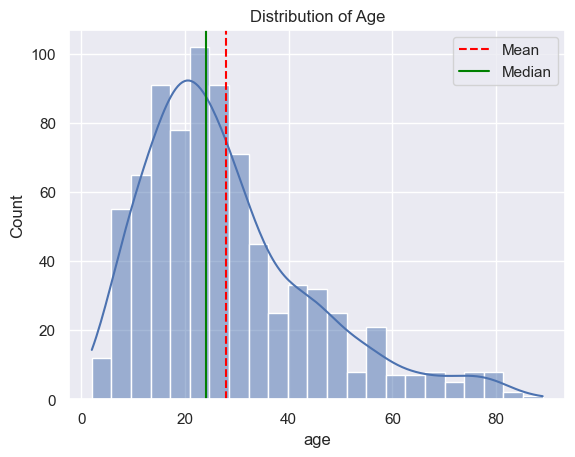

In [26]:
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)

plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()
plt.show()

Mean: 8.537303106501248
Median: 9.605299308


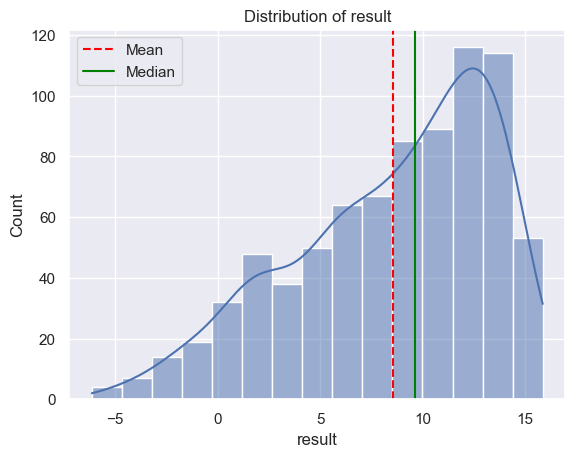

In [27]:
sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)

plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()
plt.show()

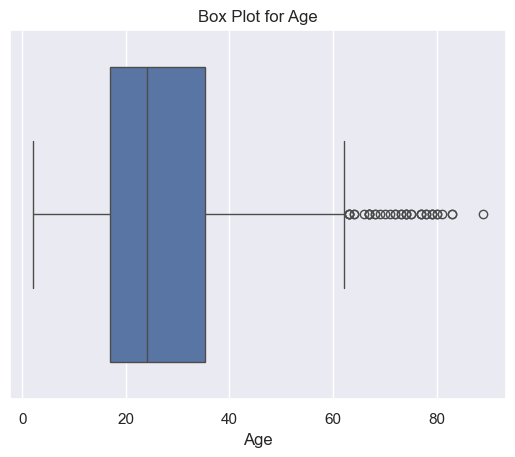

In [28]:
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

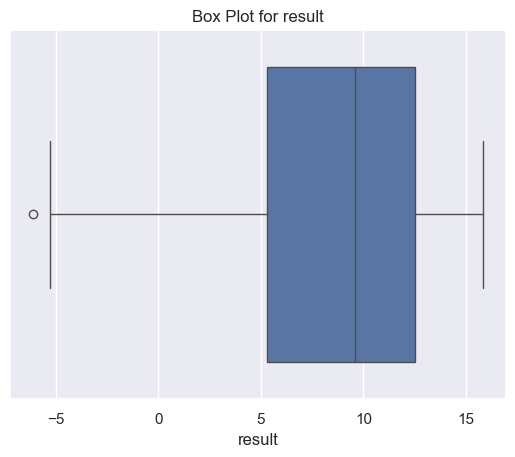

In [29]:
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [30]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [31]:
print(len(age_outliers))

39


In [32]:
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [33]:
print(len(result_outliers))

1


In [34]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

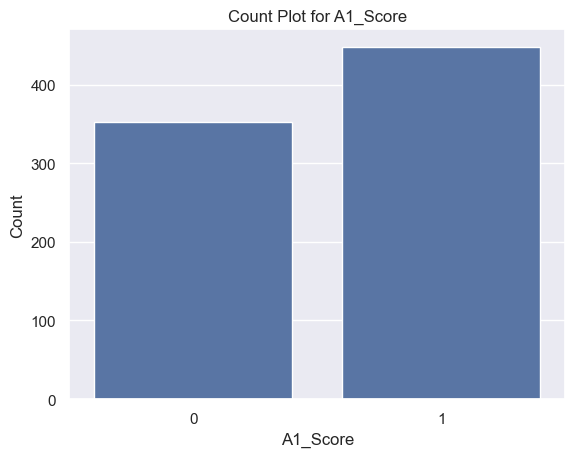

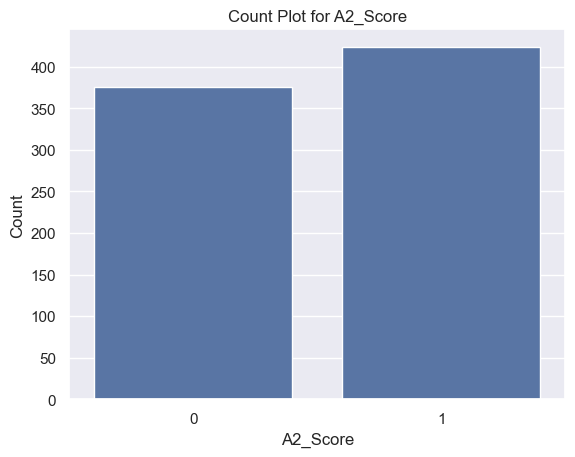

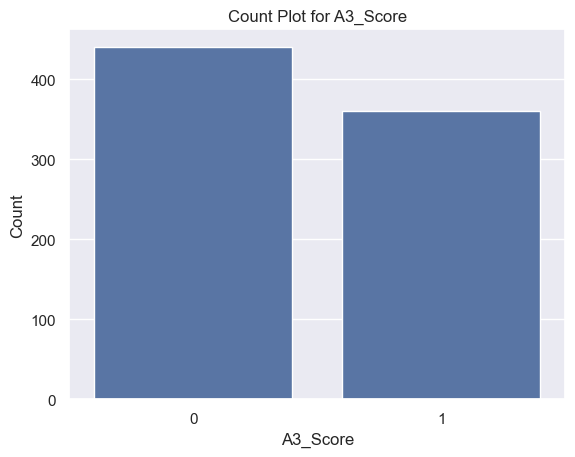

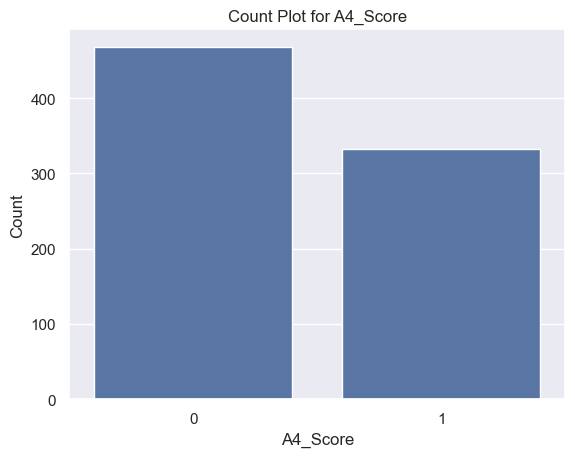

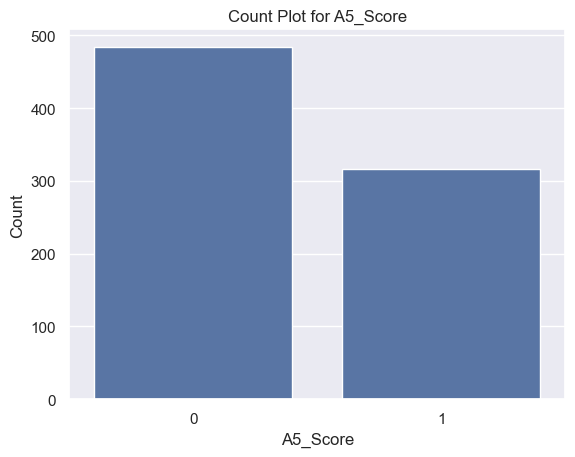

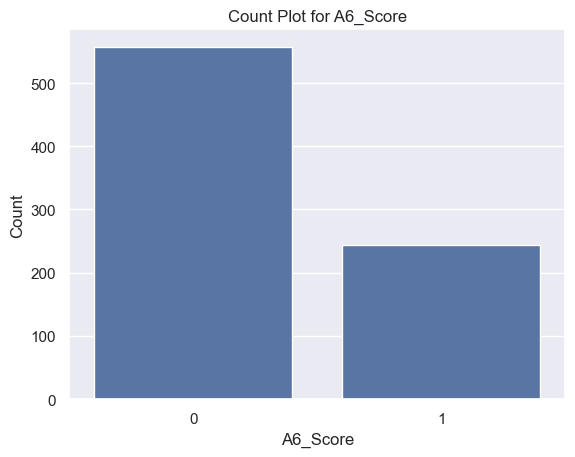

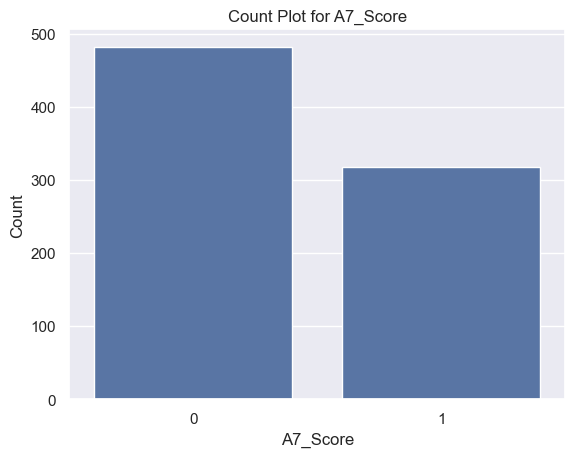

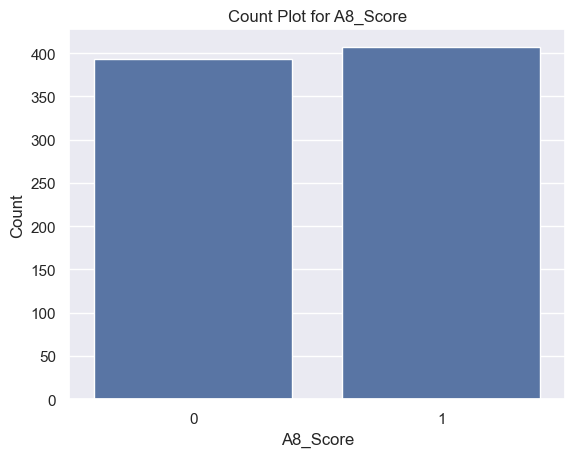

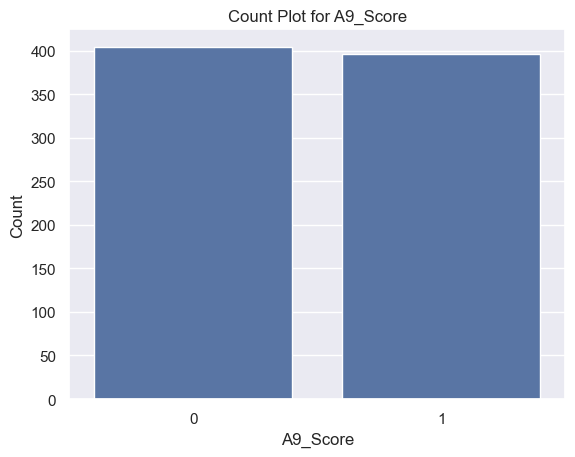

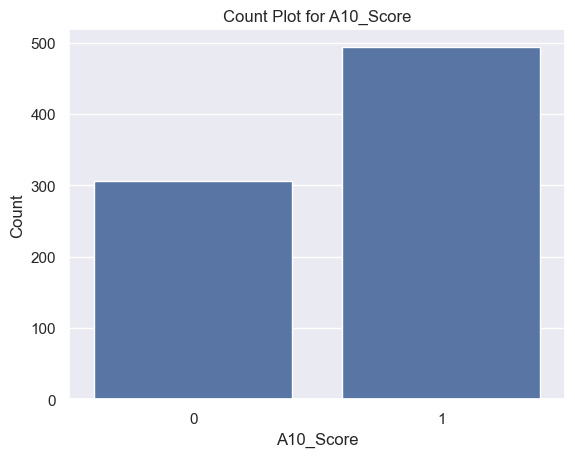

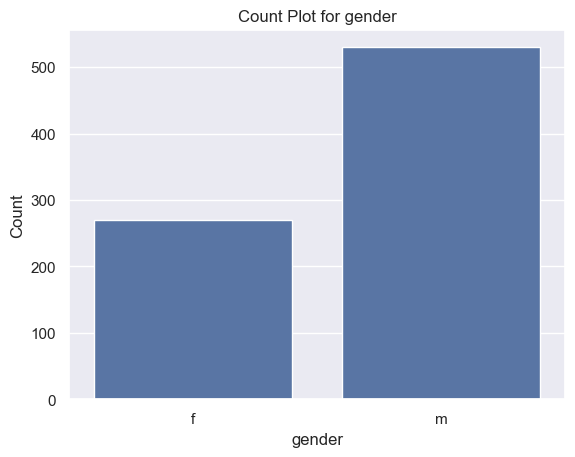

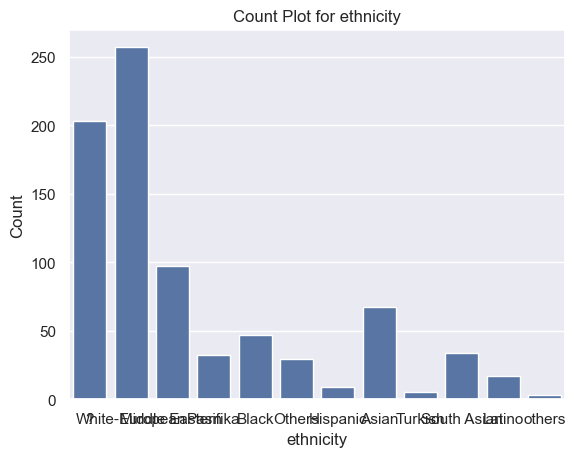

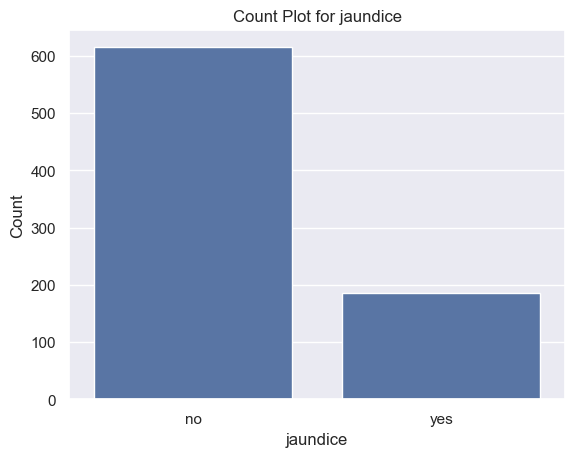

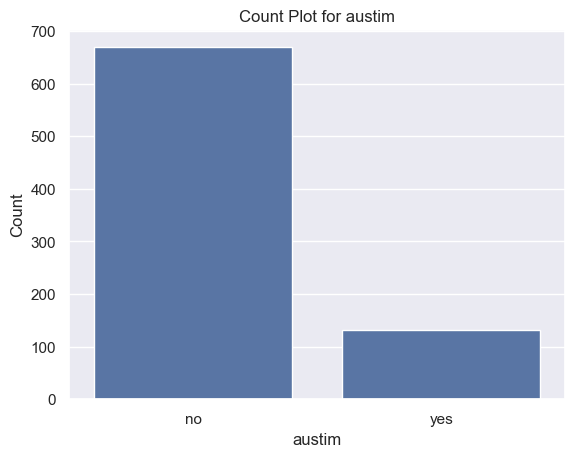

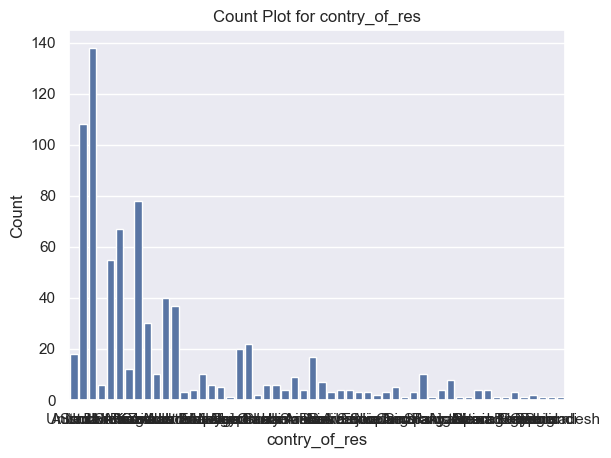

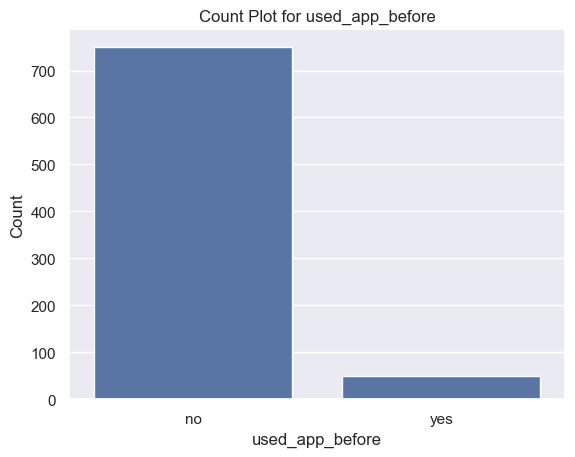

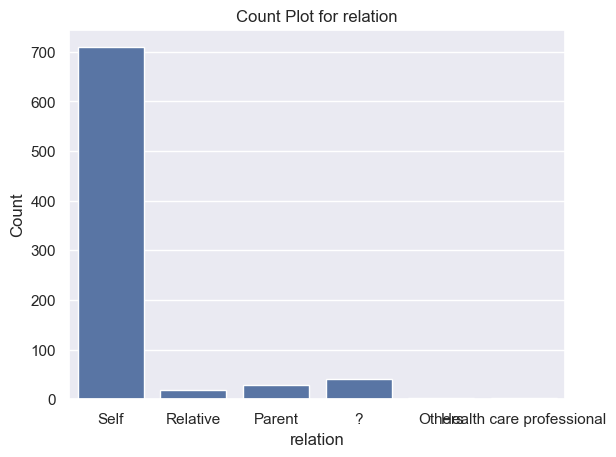

In [35]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

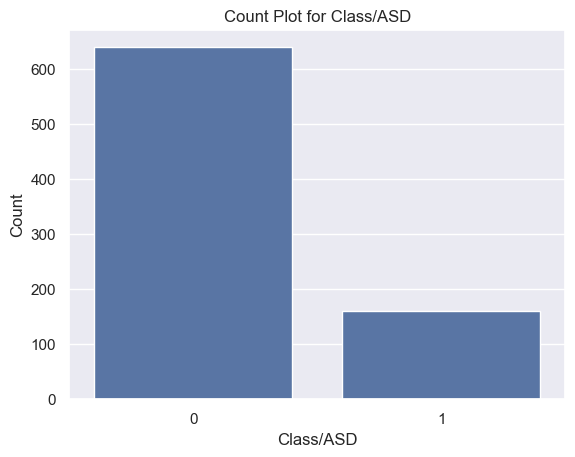

In [36]:
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [37]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

<h4> Handling Missing Values

In [39]:
df['ethnicity'] = df['ethnicity'].replace({"?":"Others","others":"Others"})

In [40]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [41]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [42]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [43]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [44]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         1   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice austim  \
0         0         1          1   38      f          Others       no     no   
1         0         0          0   47      m          Others       no     no   
2         1         1          1    7      m  White-European       no    yes   
3         0         0          0   23      f          Others       no     no   
4         0         0          0   43      m          Others       no     no   

   contry_of_res used_app_before     result relation  Class/ASD  
0        Austria              no   6.351166     Self          0  
1          India              no   2.255185     Self          0  
2  United States              no  14.851484     Self          1  
3  United States              no   2.276617     Self          0  
4   South Africa              no  -4.777286     Self          0

<h4> Label Encoding

In [46]:
object_columns = df.select_dtypes(include=["object"]).columns

In [47]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [48]:
encoders = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   

with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [49]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [50]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         1   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jaundice  austim  \
0         0         1          1   38       0          5         0       0   
1         0         0          0   47       1          5         0       0   
2         1         1          1    7       1          9         0       1   
3         0         0          0   23       0          5         0       0   
4         0         0          0   43       1          5         0       0   

   contry_of_res  used_app_before     result  relation  Class/ASD  
0              6                0   6.351166         1          0  
1             23                0   2.255185         1          0  
2             52                0  14.851484         1          1  
3             52                0   2.276617         1          0  
4             44                0  -4.777286         1          0

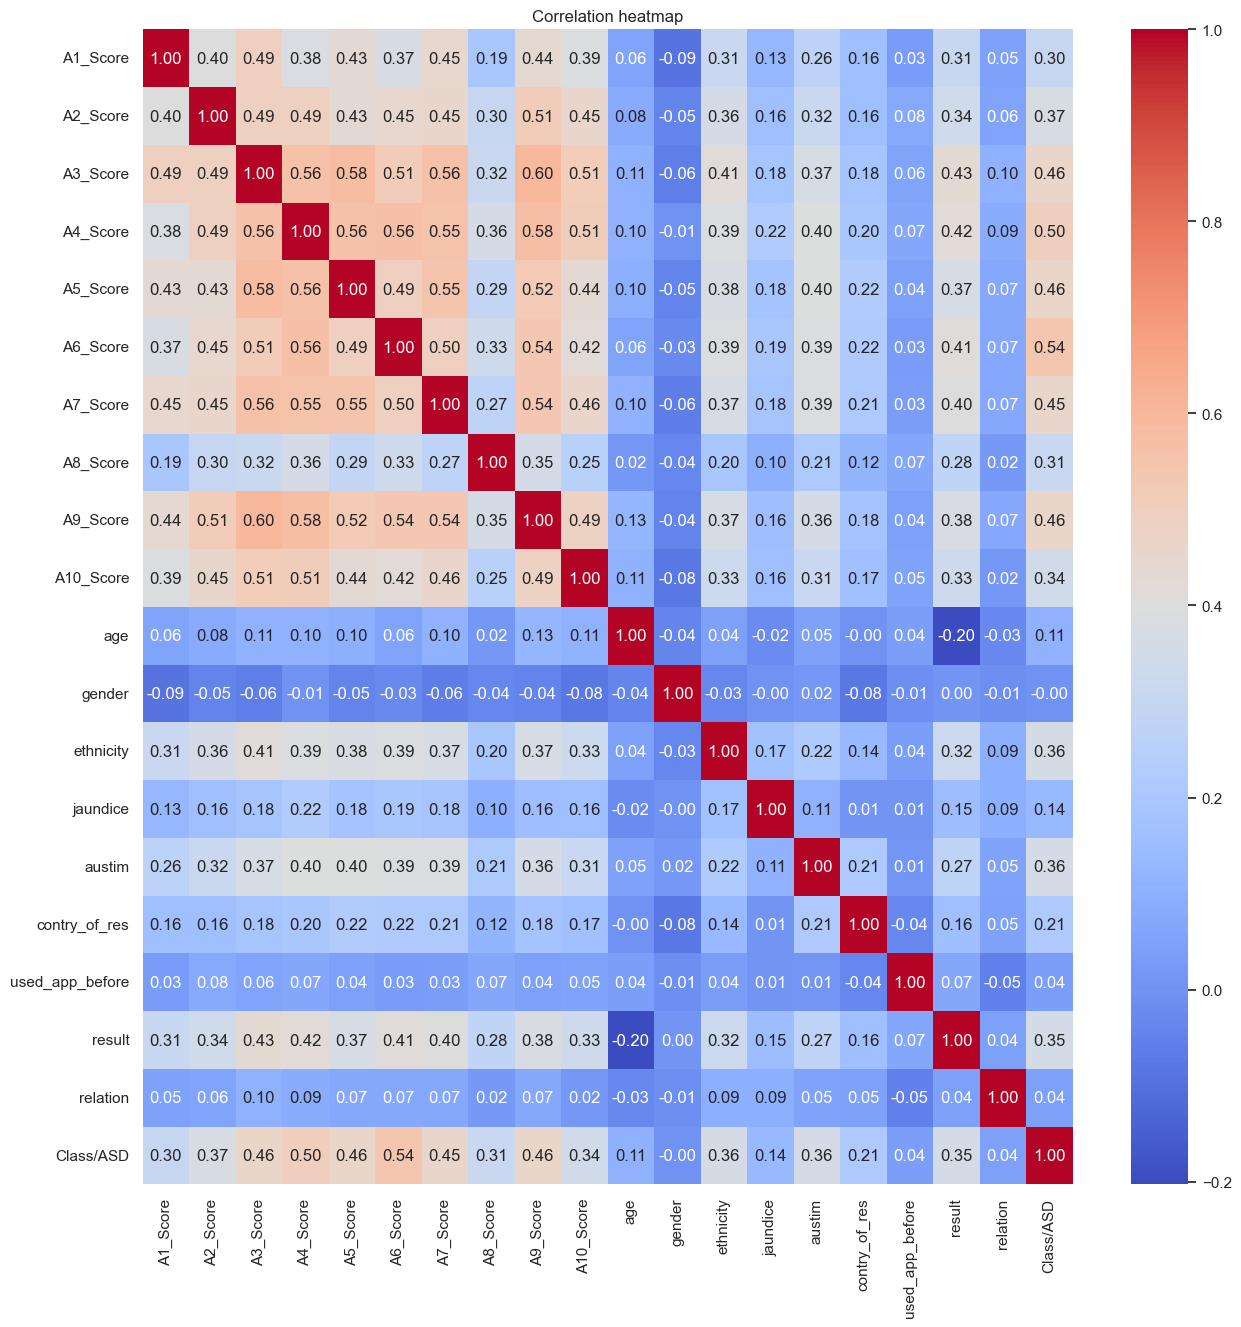

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

<h4> Handling the Outliers

In [53]:
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [54]:
df = replace_outliers_with_median(df, "age")
df = replace_outliers_with_median(df, "result")

In [55]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         1   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  austim  \
0         0         1          1  38.0       0          5         0       0   
1         0         0          0  47.0       1          5         0       0   
2         1         1          1   7.0       1          9         0       1   
3         0         0          0  23.0       0          5         0       0   
4         0         0          0  43.0       1          5         0       0   

   contry_of_res  used_app_before     result  relation  Class/ASD  
0              6                0   6.351166         1          0  
1             23                0   2.255185         1          0  
2             52                0  14.851484         1          1  
3             52                0   2.276617         1          0  
4             44                0  -4.777286         1          0

In [56]:
df.shape

(800, 20)

<h4> Train Test Split

In [111]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [113]:
X = df.drop(columns=["Class/ASD"])
y = df['Class/ASD']

In [115]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [117]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [121]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [123]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [125]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

<h4> SMOTE (Synthetic Minority Oversampling technique)

In [129]:
smote = SMOTE(random_state=42)

In [131]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [133]:
print(y_train_smote.shape)

(1030,)


In [135]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


<h4> Model Training

In [138]:
model = RandomForestClassifier(random_state=42)

<h4> Hyperparameter Tuning using Random SearchCV

In [141]:
param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [143]:
random_search_rf = RandomizedSearchCV(estimator=model, param_distributions=param_grid_rf, 
                                      n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [145]:
random_search_rf.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [147]:
random_search_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)

In [149]:
random_search_rf.best_score_

0.9271844660194175

<h4> Final Model Training

In [151]:
model_rf = RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
model_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)

<h4> Model Evaluation

In [159]:
y_test_pred = model_rf.predict(X_test)
print("Accuracy score on Testing Data:", accuracy_score(y_test, y_test_pred))

Accuracy score on Testing Data: 0.81875


In [161]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
 [[108  16]
 [ 13  23]]


In [163]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

